In [112]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 


In [79]:
sns.set(
    font_scale=1,
    style="whitegrid",
    rc={'figure.figsize':(20,10)}
        )

In [3]:
df = pd.read_csv('conversion.csv')

In [5]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [6]:
df.shape

(1143, 11)

In [7]:
df.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [12]:
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [13]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [17]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [36]:
df.interest.value_counts()

16     140
10      85
29      77
27      60
15      51
28      51
20      49
64      48
63      46
18      43
26      41
21      36
22      33
32      33
19      32
25      26
31      25
2       25
30      25
7       24
24      24
23      23
36      21
65      19
66      11
107      8
110      8
101      7
102      7
112      7
105      7
108      7
111      6
100      6
113      6
109      6
106      5
104      5
103      5
114      5
Name: interest, dtype: int64

In [31]:
# Число уникальных рекламных компаний 
df.xyz_campaign_id.unique()

array([ 916,  936, 1178], dtype=int64)

In [73]:
df_fb_id = df.groupby('fb_campaign_id', as_index=False)\
.agg({'Impressions' : 'sum'})\
.sort_values('Impressions', ascending=False)

In [81]:
df_fb_id['Impressions'] = np.log(df_fb_id['Impressions'])

In [82]:
df_fb_id

,fb_campaign_id,Impressions
489,11.881893,15.525402
537,11.882238,15.461686
415,11.881256,15.371004
466,11.881720,15.255633
578,11.882584,15.148409
...,...,...
373,11.724539,5.505332
57,11.596218,5.476464
362,11.724150,5.389072
371,11.724466,5.293305


C:\Users\IVAN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


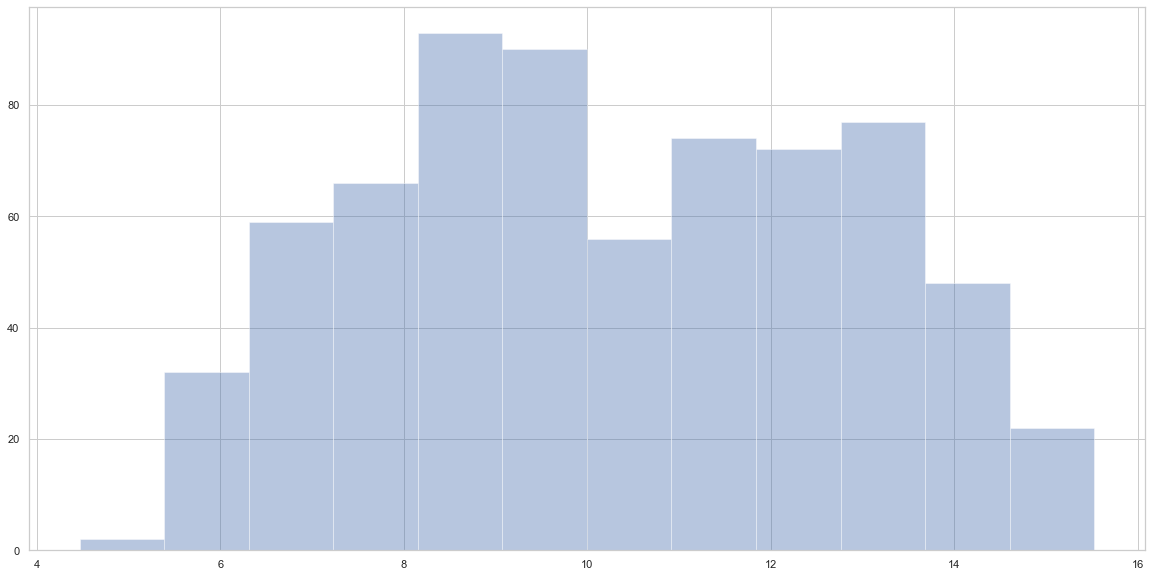

In [86]:
# Распределение кол-во показов 
sns.distplot(x=df_fb_id['Impressions'], kde=False)
None

# Распределение бимодальное 
# Не является нормальным 

In [87]:
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2


In [88]:
# Рассчитаем число кликов для каждой отдельной рекламы в зависимости от числа показов

In [91]:
df_ctr = df.groupby('ad_id', as_index=False)\
.agg({'Impressions': 'sum', 'Clicks':'sum', ''})

In [92]:
df_ctr

,ad_id,Impressions,Clicks
0,708746,7350,1
1,708749,17861,2
2,708771,693,0
3,708815,4259,1
4,708818,4133,1
...,...,...,...
1138,1314410,1129773,252
1139,1314411,637549,120
1140,1314412,151531,28
1141,1314414,790253,135


In [95]:
df_ctr['CTR'] = df_ctr['Clicks']/df_ctr['Impressions']*100

In [97]:
df_ctr.sort_values('CTR', ascending=False)

,ad_id,Impressions,Clicks,CTR
150,738637,944,1,0.105932
440,950224,2367,2,0.084495
505,951779,3277,2,0.061031
476,951202,5307,3,0.056529
448,950537,1884,1,0.053079
...,...,...,...,...
270,777166,2383,0,0.000000
269,777131,6359,0,0.000000
268,777130,6260,0,0.000000
266,776935,1136,0,0.000000


In [98]:
df['CTR'] = df_ctr['CTR']

In [101]:
df.sort_values('CTR', ascending=False)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,0.105932
440,950224,936,123464,40-44,M,20,2367,2,2.84,1,1,0.084495
505,951779,936,123723,45-49,F,27,3277,2,2.68,1,0,0.061031
476,951202,936,123627,45-49,F,26,5307,3,4.29,2,1,0.056529
448,950537,936,123516,40-44,M,36,1884,1,1.41,1,0,0.053079
...,...,...,...,...,...,...,...,...,...,...,...,...
270,777166,936,115625,30-34,M,63,2383,0,0.00,1,1,0.000000
269,777131,936,115619,35-39,M,16,6359,0,0.00,1,0,0.000000
268,777130,936,115619,35-39,M,16,6260,0,0.00,1,0,0.000000
266,776935,936,115587,45-49,M,36,1136,0,0.00,1,1,0.000000


In [110]:
df.groupby('xyz_campaign_id', as_index=False)\
.agg({'CTR':''})

,xyz_campaign_id,CTR
0,916,0.972795
1,936,7.656697
2,1178,10.138193


In [121]:
lst = [916, 936, 1178]

C:\Users\IVAN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\IVAN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\IVAN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

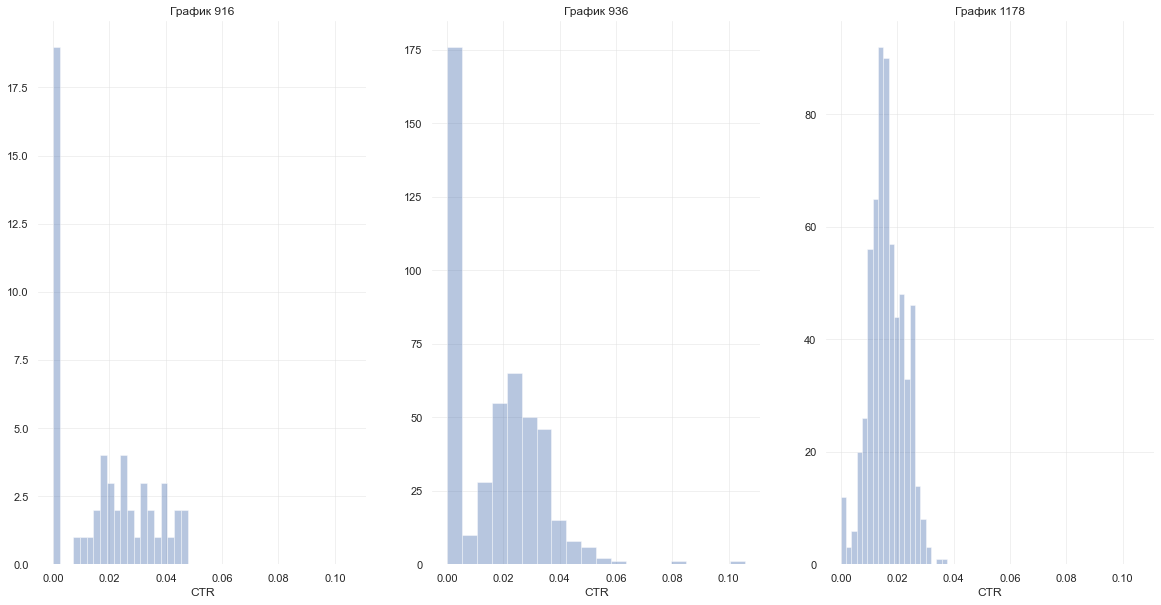

In [136]:
# График распределения CTR  (Impressions/click) в зависимости от рекламной кампании 916,936,1178


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 10), sharey='col', sharex=True)


for i, ax in zip((lst), axes.flat):
    sns.distplot(df[df['xyz_campaign_id'] == i]['CTR'], hist=True, ax=ax, bins=20, kde=False)
    
    
    
for ax in axes.flatten():
    # удаляем рамку
    ax.set_frame_on(False)  
    # делаем сетку графика совсем немного серой и наполовину прозрачной
    ax.grid(True, color='#e2e2e2', alpha=0.5)
    
    
for name, ax in zip(lst, axes.flatten()):
    ax.set(title='График {}'.format(name))
    ax.tick_params(labelbottom=True, which='both')
    
    
plt.show()

In [137]:
# Рассчитаем стоимость клика одного пользователя CPC



In [154]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.013605,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.011198,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.023480,1.25
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.024195,1.29


In [153]:
df['CPC'] = df['Spent']/df['Clicks']

In [156]:
df = df.dropna()

In [157]:
df['CPC'].describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

C:\Users\IVAN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


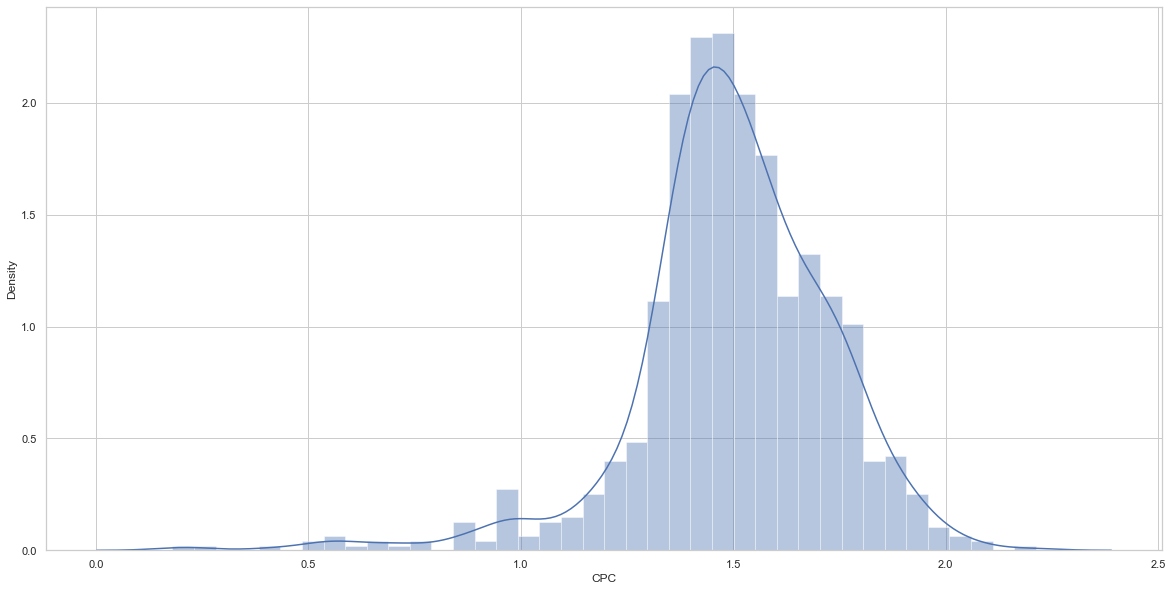

In [158]:
sns.distplot(df['CPC'])
None

In [159]:
# Рассчитаем межквартильный размах
(df['CPC'].quantile(0.75)- df['CPC'].quantile(0.25)).round(2)

0.25

In [179]:
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0.013605,1.430000
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0.011198,0.910000
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0.023480,1.250000
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0.024195,1.290000
6,708889,916,103940,30-34,M,15,15615,3,4.770000,1,0,0.019212,1.590000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,0.022305,1.421389
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0.018822,1.449000
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0.018478,1.438929
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2,0.017083,1.471926


C:\Users\IVAN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\IVAN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


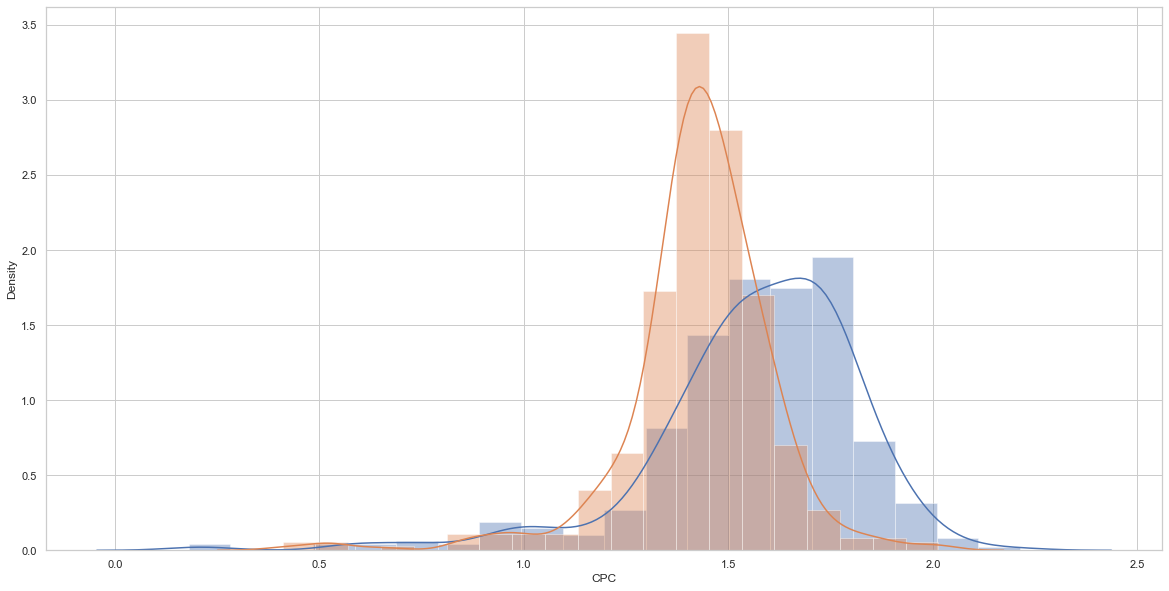

In [188]:
# Распределение CPC в зависимости от пола

sns.distplot(df[df['gender'] == 'M']['CPC'], hist=True, bins=20)
sns.distplot(df[df['gender'] == 'F']['CPC'], hist=True, bins=20)
None




C:\Users\IVAN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


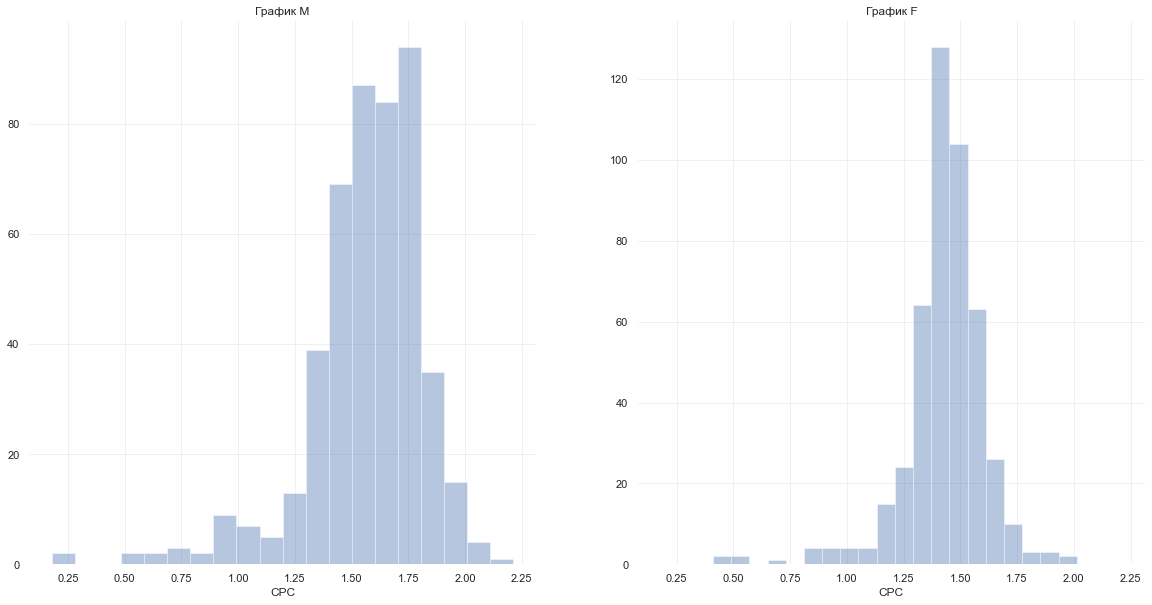

In [189]:
# Распределение CPC в зависимости от пола


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), sharey='col', sharex=True)


for i, ax in zip(['M', 'F'], axes.flat):
    sns.distplot(df[df['gender'] == i]['CPC'], hist=True, ax=ax, bins=20, kde=False)
    
    
    
for ax in axes.flatten():
    # удаляем рамку
    ax.set_frame_on(False)  
    # делаем сетку графика совсем немного серой и наполовину прозрачной
    ax.grid(True, color='#e2e2e2', alpha=0.5)
    
    
for name, ax in zip(['M','F'], axes.flatten()):
    ax.set(title='График {}'.format(name))
    ax.tick_params(labelbottom=True, which='both')
    
plt.show()   

In [203]:
df['Conversion'] = round(df['Approved_Conversion']/df['Clicks']*100, 2)

<ipython-input-203-7cc665a72229>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Conversion'] = round(df['Approved_Conversion']/df['Clicks']*100, 2)


In [204]:
df[df['ad_id'] == 1121814]

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,Conversion
860,1121814,1178,144659,30-34,F,27,2223278,421,612.300003,38,13,0.018936,1.454394,3.09
